**Rice Leaf Disease Prediction**

We will use CNN to classify images to predict type of rice plant diseases.


Import Libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
import sklearn.metrics as metrics
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pathlib
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

**Dataset**

We are considering three most common types of rice plant diseases: -

*   Leaf Smut
*   Brown Spot
*   Bacterial leaf blight

Dataset Link: - [Link](https://www.kaggle.com/datasets/vbookshelf/rice-leaf-diseases)

There are 40 images of size 120 jpg belonging to each of the three class.




Image Dataset Paths (after uploading the dataset on Google drive) : -

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/training_dataset.zip', 'r') 
zip_ref.extractall('/img') 
zip_ref.close()

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/test_dataset.zip', 'r') 
zip_ref.extractall('/img') 
zip_ref.close()


Mounted at /content/drive


Parameters: -

In [4]:
train_dataset_path = '/img/training_dataset'
validation_dataset_path = '/img/test_dataset'

IMG_WIDTH = 140
IMG_HEIGHT = 140
BATCH_SIZE = 32
 

Data Augmentation: -

For training data - 

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)
 

Found 84 images belonging to 3 classes.


For validation data:

In [6]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 36 images belonging to 3 classes.


Get the label mappings: -

In [7]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bacterial leaf blight
1 : Brown spot
2 : Leaf smut


Plot Sample training data: -

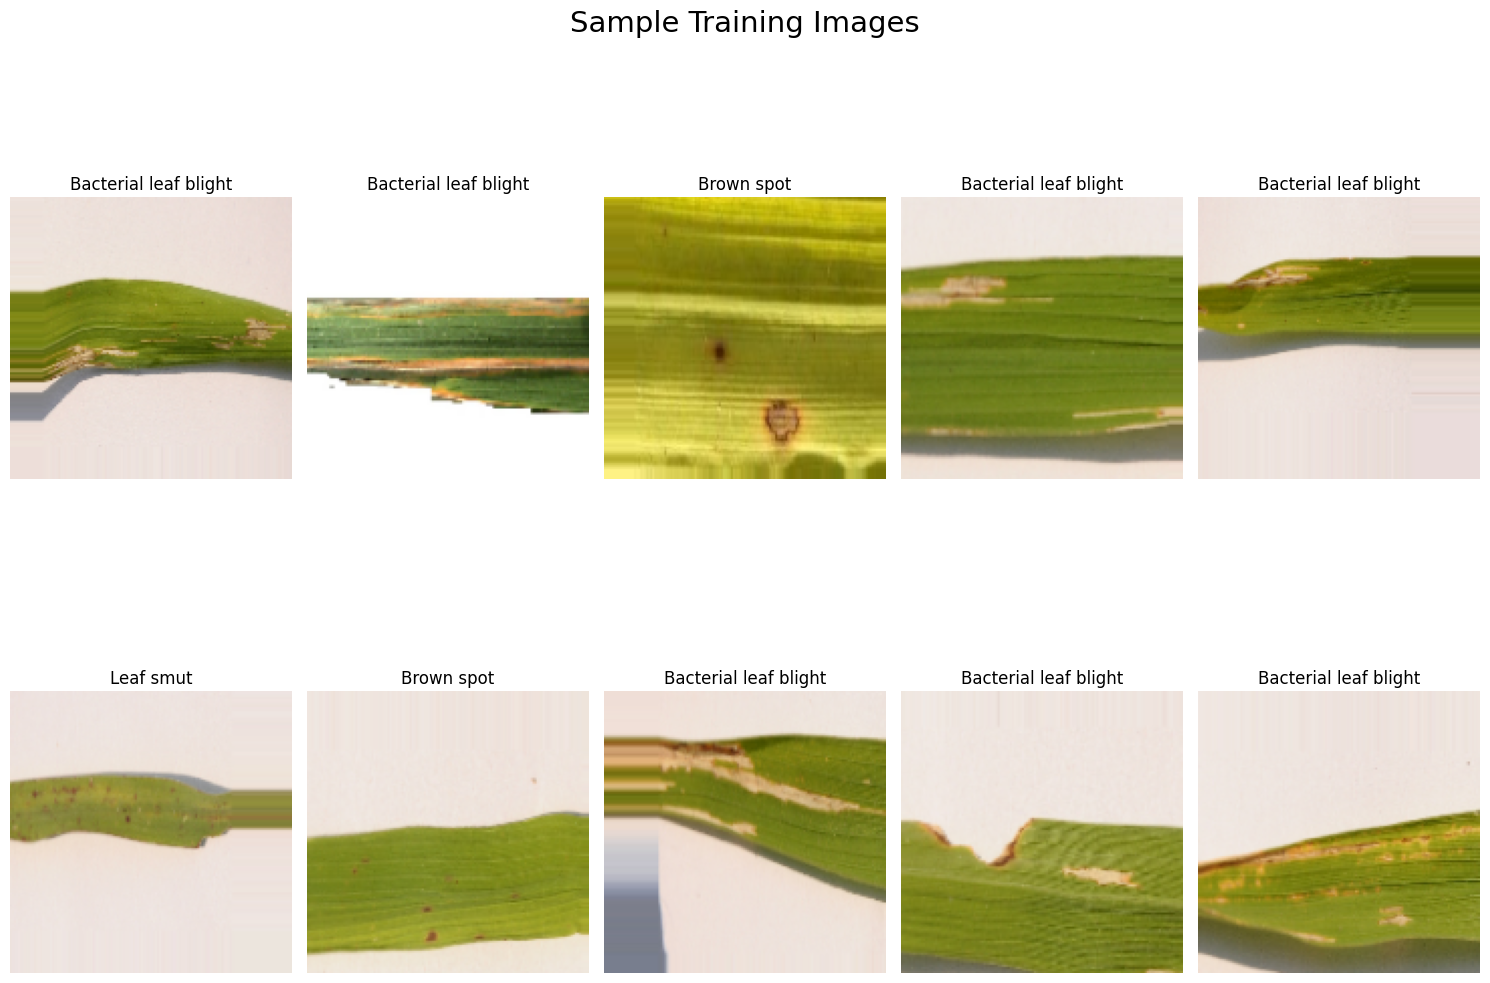

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

Building the CNN model using the **Sequential Model** of Tensorflow Keras.


In [9]:
my_model = Sequential()

my_model.add(Conv2D(128,(3,3),activation='relu', padding='valid',input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
my_model.add(MaxPooling2D(2,2))
my_model.add(BatchNormalization())

my_model.add(Conv2D(64,(3,3), padding='valid',activation='relu'))
my_model.add(MaxPooling2D(2,2))
my_model.add(BatchNormalization())

my_model.add(Conv2D(32,(3,3), padding='valid',activation='relu'))
my_model.add(MaxPooling2D(2,2))
my_model.add(BatchNormalization())

my_model.add(Conv2D(64,(3,3), padding='valid',activation='relu'))
my_model.add(MaxPooling2D(2,2))
my_model.add(BatchNormalization())

my_model.add(Dropout(0.5))
my_model.add(Flatten())
my_model.add(Dense(256,activation='relu'))
my_model.add(Dense(3))

print(my_model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 138, 138, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 69, 69, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 69, 69, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 67, 67, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 33, 33, 64)       0         
 2D)                                                             
                                                        

Compile and Train the model: -

In [10]:
my_model.compile(optimizer='adam',loss=CategoricalCrossentropy(), metrics=['accuracy'] )


history = my_model.fit(train_generator, epochs=30, validation_data=validation_generator)



Epoch 1/30
3/3 [==============================] - 14s 4s/step - loss: 5.8814 - accuracy: 0.2738 - val_loss: 5.6152 - val_accuracy: 0.3333
Epoch 2/30
3/3 [==============================] - 11s 3s/step - loss: 3.0864 - accuracy: 0.4762 - val_loss: 5.3383 - val_accuracy: 0.3333
Epoch 3/30
3/3 [==============================] - 11s 4s/step - loss: 2.2076 - accuracy: 0.4405 - val_loss: 7.1797 - val_accuracy: 0.3333
Epoch 4/30
3/3 [==============================] - 10s 3s/step - loss: 2.0735 - accuracy: 0.4405 - val_loss: 6.0199 - val_accuracy: 0.3333
Epoch 5/30
3/3 [==============================] - 11s 4s/step - loss: 1.8301 - accuracy: 0.5595 - val_loss: 1.3423 - val_accuracy: 0.3333
Epoch 6/30
3/3 [==============================] - 11s 4s/step - loss: 1.1424 - accuracy: 0.5595 - val_loss: 1.1727 - val_accuracy: 0.3333
Epoch 7/30
3/3 [==============================] - 10s 3s/step - loss: 1.0617 - accuracy: 0.5952 - val_loss: 1.1260 - val_accuracy: 0.3056
Epoch 8/30
3/3 [==================

Plot the graphs: - 

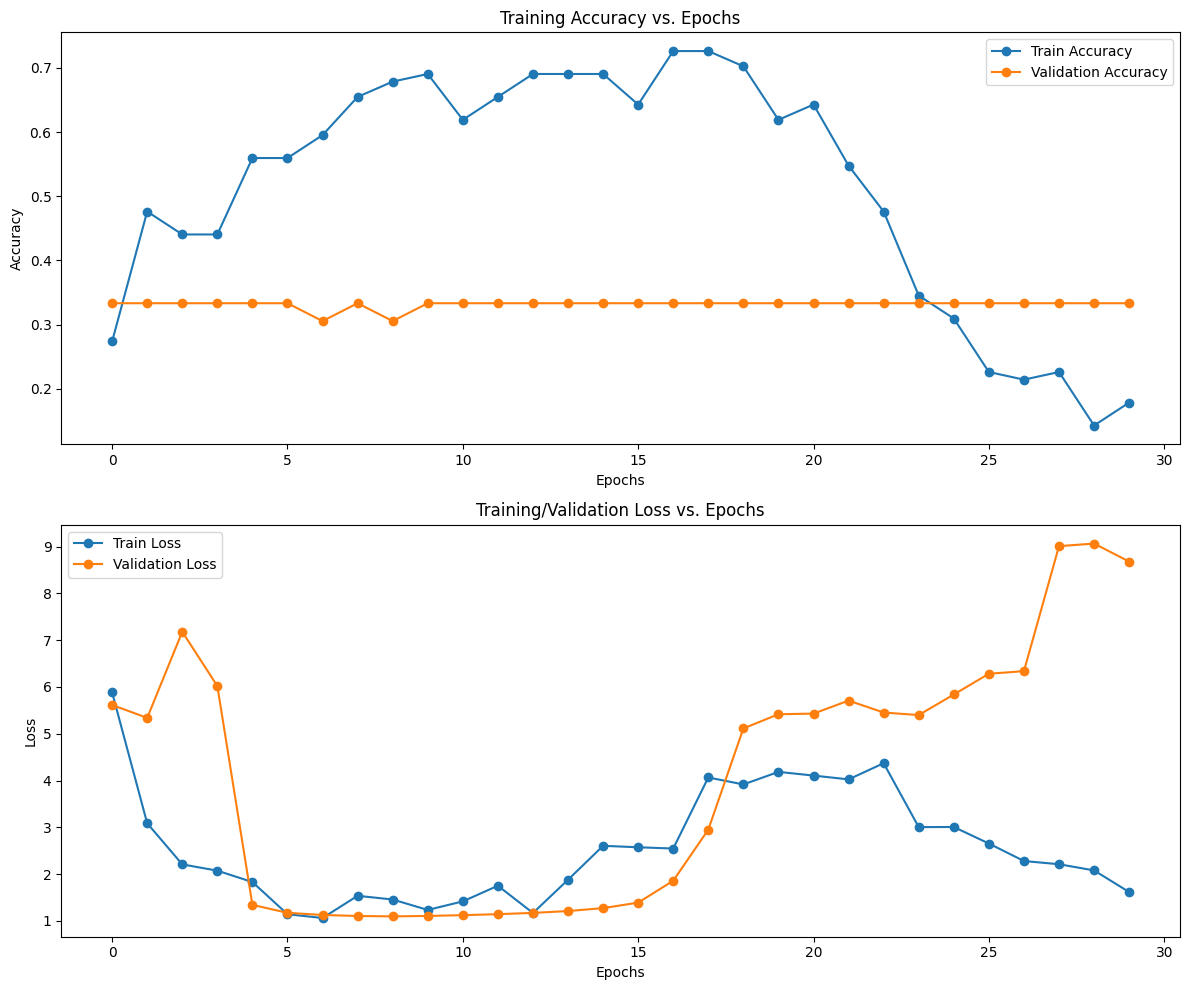

In [11]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

Test Dataset: -

In [12]:
test_dataset_path = '/img/test_dataset'

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset_path,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 36 images belonging to 3 classes.


Testing the model with test dataset: -

In [13]:
test_loss, test_accuracy = my_model.evaluate(test_generator, batch_size=BATCH_SIZE)

2/2 [==============================] - 2s 68ms/step - loss: 8.6797 - accuracy: 0.3333


In [14]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     8.679694175720215
Test Accuracy: 0.3333333432674408
